In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
try:
    import mxnet as mx
except:
    sys.stderr.write("Cannot import mxnet.\n")
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.interpolation import map_coordinates
from skimage.exposure import rescale_intensity
from skimage.transform import rotate

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *
from visualization_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for AWS compute node
rm -rf "/shared/CSHL_data_processed/MD585/MD585_sorted_filenames.txt" && mkdir -p "/shared/CSHL_data_processed/MD585"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_sorted_filenames.txt" "/shared/CSHL_data_processed/MD585/MD585_sorted_filenames.txt"
rm -rf "/shared/CSHL_data_processed/MD585/MD585_anchor.txt" && mkdir -p "/shared/CSHL_data_processed/MD585"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_anchor.txt" "/shared/CSHL_data_processed/MD585/MD585_anchor.txt"
rm -rf "/shared/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" && mkdir -p "/shared/CSHL_data_processed/MD585"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt" "/shared/CSHL_data_processed/MD585/MD585_alignedTo_MD585-N47-2015.07.16-22.50.52_MD585_3_0141_cropbox.txt"
rm -rf "/shared/CSHL_data_processed/MD589

rm -rf "/shared/CSHL_data_processed/MD599/MD599_sorted_filenames.txt" && mkdir -p "/shared/CSHL_data_processed/MD599"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD599/MD599_sorted_filenames.txt" "/shared/CSHL_data_processed/MD599/MD599_sorted_filenames.txt"
rm -rf "/shared/CSHL_data_processed/MD599/MD599_anchor.txt" && mkdir -p "/shared/CSHL_data_processed/MD599"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD599/MD599_anchor.txt" "/shared/CSHL_data_processed/MD599/MD599_anchor.txt"
rm -rf "/shared/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropbox.txt" && mkdir -p "/shared/CSHL_data_processed/MD599"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropbox.txt" "/shared/CSHL_data_processed/MD599/MD599_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropbox.txt"
rm -rf "/shared/CSHL_data_processed/MD602/MD602_sorted_filenames.txt" && mkd

rm -rf "/shared/CSHL_data_processed/MD661/MD661_sorted_filenames.txt" && mkdir -p "/shared/CSHL_data_processed/MD661"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_sorted_filenames.txt" "/shared/CSHL_data_processed/MD661/MD661_sorted_filenames.txt"
rm -rf "/shared/CSHL_data_processed/MD661/MD661_anchor.txt" && mkdir -p "/shared/CSHL_data_processed/MD661"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_anchor.txt" "/shared/CSHL_data_processed/MD661/MD661_anchor.txt"
rm -rf "/shared/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_cropbox.txt" && mkdir -p "/shared/CSHL_data_processed/MD661"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_cropbox.txt" "/shared/CSHL_data_processed/MD661/MD661_alignedTo_MD662&661-F116-2017.06.07-04.39.41_MD661_1_0346_cropbox.txt"
rm -rf "/shared/CSHL_data_processed/MD662/MD662_sorted_filenames.tx

rm -rf "/shared/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif" && mkdir -p "/shared/CSHL_data_processed/MD652/MD652_prep2_thumbnail"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif" "/shared/CSHL_data_processed/MD652/MD652_prep2_thumbnail/MD652-F15-2016.12.16-20.45.52_MD652_3_0045_prep2_thumbnail.tif"
rm -rf "/shared/CSHL_data_processed/MD642/MD642_prep2_thumbnail/MD642-N14-2017.01.18-16.25.58_MD642_2_0041_prep2_thumbnail.tif" && mkdir -p "/shared/CSHL_data_processed/MD642/MD642_prep2_thumbnail"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_prep2_thumbnail/MD642-N14-2017.01.18-16.25.58_MD642_2_0041_prep2_thumbnail.tif" "/shared/CSHL_data_processed/MD642/MD642_prep2_thumbnail/MD642-N14-2017.01.18-16.25.58_MD642_2_0041_prep2_thumbnail.tif"
rm -rf "/shared/CSHL_data_processed/MD657/MD657_prep2_thumbnail/

In [3]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=8, batch_size=batch_size)

rm -rf "/shared/mxnet_models/inception-bn-blue" && mkdir -p "/shared/mxnet_models"
aws s3 cp --recursive "s3://mousebrainatlas-data/mxnet_models/inception-bn-blue" "/shared/mxnet_models/inception-bn-blue"


/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:52: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:64: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [4]:
# model_dir_name = 'inception-bn-blue'
# download_from_s3(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name), is_dir=True)
# model_name = 'inception-bn-blue'
# model_iteration = 0
# output_symbol_name = 'flatten_output'
# output_dim = 1024
# mean_img = np.load(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name, 'mean_224.npy'))

# # Reference on how to predict with mxnet model:
# # https://github.com/dmlc/mxnet-notebooks/blob/master/python/how_to/predict.ipynb
# model0, arg_params, aux_params = mx.model.load_checkpoint(os.path.join(MXNET_MODEL_ROOTDIR, model_dir_name, model_name), 0)
# flatten_output = model0.get_internals()[output_symbol_name]
# # if HOST_ID == 'workstation':
# # model = mx.mod.Module(context=[mx.gpu(i) for i in range(1)], symbol=flatten_output)
# # else:
# model = mx.mod.Module(context=[mx.gpu(i) for i in range(8)], symbol=flatten_output)

# # Increase batch_size to 500 does not save any time.
# batch_size = 256
# model.bind(data_shapes=[('data', (batch_size,1,224,224))], for_training=False)
# model.set_params(arg_params=arg_params, aux_params=aux_params, allow_missing=True)

In [5]:
dataset_settings

classes      network_model            stain  \
dataset_id                                                                  
20                                NaN       Inception-BN            nissl   
21                                NaN       Inception-BN            nissl   
22                                NaN       Inception-BN            nissl   
23          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
24          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
25          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
26                                NaN  inception-bn-blue            nissl   
27                                NaN  inception-bn-blue            nissl   
28                                NaN  inception-bn-blue            nissl   
29                                neg  inception-bn-blue            nissl   
30          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
31          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
32          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
33          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
34          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
35          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
36          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
37          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
38          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
39          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
40          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
41          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
50                                NaN  inception-bn-blue  neurotrace_blue   
51                                NaN  inception-bn-blue  neurotrace_blue   
60                                NaN                NaN            nissl   
61                                NaN                NaN            nissl   
62                                NaN                NaN            nissl   
63          pos/surPos/surNoclass/neg                NaN            nissl   
64          pos/surPos/surNoclass/neg                NaN            nissl   
65          pos/surPos/surNoclass/neg                NaN            nissl   
66          pos/surPos/surNoclass/neg                NaN            nissl   
67          pos/surPos/surNoclass/neg                NaN            nissl   
68          pos/surPos/surNoclass/neg                NaN            nissl   
70          pos/surPos/surNoclass/neg  inception-bn-blue            nissl   
71          pos/surPos/surNoclass/neg  inception-bn-blue  neurotrace_blue   
90                                NaN                NaN            nissl   
92                                NaN                NaN            nissl   
93                                NaN                NaN            nissl   
94                                NaN                NaN            nissl   
95                                NaN                NaN            nissl   
96                                NaN                NaN            nissl   
97                                NaN                NaN            nissl   
98                                NaN                NaN            nissl   
99                                NaN                NaN            nissl   

           margins_um  num_sample_per_class             stacks  \
dataset_id                                                       
20            200/500                  1000              MD585   
21            200/500                  1000              MD589   
22            200/500                  1000              MD594   
23                500                  1000              MD585   
24                500                  1000              MD589   
25                500    

In [6]:
classifier_settings = read_csv(CLASSIFIER_SETTINGS_CSV, header=0, index_col=0)
classifier_settings

model  margin_um       train_set_id  \
classifier_id                                                            
30                                    lr        500              20/21   
31                                    lr        500              21/22   
32                                    lr        500              20/22   
33                                   gb1        500              20/21   
34                                   gb1        500              21/22   
35                                   gb1        500              20/22   
36                                   gb1        500              23/24   
37                                    lr        500              23/24   
38                                    lr        500        23/24/27/28   
39                                    lr        200        30/31/27/28   
40                                    lr       1000        33/34/27/28   
41                                    lr        500        36/37/27/28   
42                                    lr        500        39/40/27/28   
50                                    lr        500  27/28/29/60/61/62   
70             inception-bn-blue-softmax        500              60/61   
71             inception-bn-blue-softmax        500           60/61/62   
72                                    lr        500           66/67/68   
80                                    lr        500              23/24   
81                                    lr        500              23/24   
82                                    lr        500              23/24   
83                                    lr        500              23/24   
84                                    lr        500              23/24   
95                                   gb2        500                 93   
96                                   gb2        500                 95   
97                                   gb2        500                 97   
98                                   gb2        500                 99   
99                                    lr        500                 99   

                             neg_composition  sample_weighting  \
classifier_id                                                    
30                      neg_has_all_surround               NaN   
31                      neg_has_all_surround               NaN   
32                      neg_has_all_surround               NaN   
33                      neg_has_all_surround               NaN   
34                      neg_has_all_surround               NaN   
35                      neg_has_all_surround               NaN   
36                      neg_has_all_surround               NaN   
37                      neg_has_all_surround               NaN   
38             neg_has_surround_and_negative               NaN   
39             neg_has_surround_and_negative               NaN   
40             neg_has_surround_and_negative               NaN   
41             neg_has_surround_and_negative               NaN   
42             neg_has_surround_and_negative               NaN   
50             neg_has_surround_and_negative               NaN   
70                      neg_has_all_surround               NaN   
71                      neg_has_all_surround               NaN   
72             neg_has_surround_and_negative               NaN   
80                      neg_has_all_surround               NaN   
81                      neg_has_all_surround               NaN   
82                      neg_has_all_surround               NaN   
83                      neg_has_all_surround               NaN   
84                      neg_has_all_surround               NaN   
95                      neg_has_all_surround               NaN   
96                      neg_has_all_surround               NaN   
97                      neg_has_all_surround               NaN   
98                      neg_has_all_surround               NaN   
99                      neg_has_all_surr

# Train

In [208]:
classifier_id = 50
classifier_properties = classifier_settings.loc[classifier_id]

margin_um = classifier_properties['margin_um']
feature_classifier_model = classifier_properties['model']
sample_weighting = classifier_properties['sample_weighting']
neg_composition = classifier_properties['neg_composition']
svm_id = int(classifier_properties['svm_id'])

In [209]:
# Determine which labels to load.

structures_to_sample = [structure]
# structures_to_sample = all_known_structures
# structures_to_sample = ['Pn']

negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

margins_to_sample = [margin_um]
surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                             for m in margins_to_sample
                             for s in structures_to_sample 
                             for surr_l in all_known_structures
                             if surr_l != s]
surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                             for m in margins_to_sample
                             for s in structures_to_sample]

if neg_composition == 'neg_has_everything_else':
    labels_to_sample = structures_to_sample + negative_labels_to_sample
elif neg_composition == 'neg_has_only_surround_noclass':
    labels_to_sample = structures_to_sample + surround_noclass_labels_to_sample + ['noclass']
elif neg_composition == 'neg_has_all_surround':
    labels_to_sample = structures_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample + ['noclass']
elif neg_composition == 'neg_has_surround_and_negative':
    labels_to_sample = structures_to_sample + negative_labels_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample

In [7]:
# Load training dataset.

# training_set_ids = map(int, str(classifier_properties['train_set_id']).split('/'))
# training_features, training_addresses = load_datasets(training_set_ids, labels_to_sample=labels_to_sample)

In [211]:
training_set_ids = [60, 61, 62]
training_patches, _ = load_dataset_images(training_set_ids, labels_to_sample=labels_to_sample)

rm -rf "/shared/CSHL_classifiers/datasets/dataset_60/patch_images_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_60"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_60/patch_images_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_60/patch_images_VCA.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_60/patch_addresses_VCA.pkl" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_60"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_60/patch_addresses_VCA.pkl" "/shared/CSHL_classifiers/datasets/dataset_60/patch_addresses_VCA.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_60/patch_images_VCA_negative.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_60"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_60/patch_images_VCA_negative.hdf" "/shared/CSHL_classifiers/datasets/dataset_60/patch_images_VCA_negative.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_60/patch_images_VCA_

rm -rf "/shared/CSHL_classifiers/datasets/dataset_60/patch_addresses_VCA_surround_500_VCP.pkl" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_60"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_60/patch_addresses_VCA_surround_500_VCP.pkl" "/shared/CSHL_classifiers/datasets/dataset_60/patch_addresses_VCA_surround_500_VCP.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_60/patch_images_VCA_surround_500_DC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_60"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_60/patch_images_VCA_surround_500_DC.hdf" "/shared/CSHL_classifiers/datasets/dataset_60/patch_images_VCA_surround_500_DC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_60/patch_addresses_VCA_surround_500_DC.pkl" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_60"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_60/patch_addresses_VCA_surround_500_DC.pkl" "/shared/CSHL_classifiers/da

rm -rf "/shared/CSHL_classifiers/datasets/dataset_61/patch_images_VCA_surround_500_VLL.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_61"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_61/patch_images_VCA_surround_500_VLL.hdf" "/shared/CSHL_classifiers/datasets/dataset_61/patch_images_VCA_surround_500_VLL.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_61/patch_images_VCA_surround_500_RMC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_61"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_61/patch_images_VCA_surround_500_RMC.hdf" "/shared/CSHL_classifiers/datasets/dataset_61/patch_images_VCA_surround_500_RMC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_61/patch_images_VCA_surround_500_SNC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_61"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_61/patch_images_VCA_surround_500_SNC.hdf" "/shared/CSHL_classifiers/datasets/dat

rm -rf "/shared/CSHL_classifiers/datasets/dataset_62/patch_images_VCA.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_62"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_62/patch_images_VCA.hdf" "/shared/CSHL_classifiers/datasets/dataset_62/patch_images_VCA.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_62/patch_addresses_VCA.pkl" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_62"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_62/patch_addresses_VCA.pkl" "/shared/CSHL_classifiers/datasets/dataset_62/patch_addresses_VCA.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_62/patch_images_VCA_negative.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_62"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_62/patch_images_VCA_negative.hdf" "/shared/CSHL_classifiers/datasets/dataset_62/patch_images_VCA_negative.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_62/patch_images_VCA_

rm -rf "/shared/CSHL_classifiers/datasets/dataset_62/patch_addresses_VCA_surround_500_VCP.pkl" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_62"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_62/patch_addresses_VCA_surround_500_VCP.pkl" "/shared/CSHL_classifiers/datasets/dataset_62/patch_addresses_VCA_surround_500_VCP.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_62/patch_images_VCA_surround_500_DC.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_62"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_62/patch_images_VCA_surround_500_DC.hdf" "/shared/CSHL_classifiers/datasets/dataset_62/patch_images_VCA_surround_500_DC.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_62/patch_addresses_VCA_surround_500_DC.pkl" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_62"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_62/patch_addresses_VCA_surround_500_DC.pkl" "/shared/CSHL_classifiers/da

In [212]:
variants = range(0, 8)

In [213]:
training_features = {}
for s, ps in training_patches.iteritems():
    feats = []
    for v in variants:
        ps_var = rotate_all_patches_variant(ps, variant=v)
        feats_var = convert_image_patches_to_features(patches=ps_var, model=model, mean_img=mean_img, batch_size=batch_size)
        feats.append(feats_var)
    feats_arr = np.concatenate(feats)
    training_features[s] = feats_arr

In [215]:
neg_features, _ = load_datasets([27,28,29], labels_to_sample=negative_labels_to_sample)

rm -rf "/shared/CSHL_classifiers/datasets/dataset_27/patch_features.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_27"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_27/patch_features.hdf" "/shared/CSHL_classifiers/datasets/dataset_27/patch_features.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_28/patch_addresses.pkl" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_28"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_28/patch_addresses.pkl" "/shared/CSHL_classifiers/datasets/dataset_28/patch_addresses.pkl"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_28/patch_features.hdf" && mkdir -p "/shared/CSHL_classifiers/datasets/dataset_28"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/datasets/dataset_28/patch_features.hdf" "/shared/CSHL_classifiers/datasets/dataset_28/patch_features.hdf"
rm -rf "/shared/CSHL_classifiers/datasets/dataset_29/patch_addresses.pkl" && mkdir -p "/shared/CSHL_classifiers/datasets/

In [216]:
training_features['VCA_negative'] = neg_features['VCA_negative']

In [217]:
labels_found = training_features.keys()
structures_found = set([convert_to_original_name(l) for l in labels_found 
                        if convert_to_original_name(l) in labels_found]) - {'noclass'}

In [218]:
from sklearn.externals import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier 

sys.path.append('/home/yuncong/csd395/xgboost/python-package')
try:
    from xgboost.sklearn import XGBClassifier
except:
    sys.stderr.write('xgboost is not loaded.')

xgboost is not loaded.

In [219]:
print structure

#############################
## Define Positive Samples ##
#############################

features_pos = training_features[structure]
n_pos = len(features_pos)
print n_pos, 'positive examples'

#############################
## Define Negative Samples ##
#############################

if neg_composition == 'neg_has_only_surround_noclass':
    neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
elif neg_composition == 'neg_has_all_surround':
    neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
    for surr_s in all_known_structures:
        c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
        if c in labels_found:
            neg_classes.append(c)
elif neg_composition == 'neg_has_everything_else':
    neg_classes = [structure + '_negative']
elif neg_composition == 'neg_has_surround_and_negative':
    neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
    for surr_s in all_known_structures:
        c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
        if c in labels_found:
            neg_classes.append(c)
    neg_classes += [structure + '_negative']
else:
    raise Exception('neg_composition %s is not recognized.' % neg_composition)

features_neg = np.concatenate([training_features[neg_class] for neg_class in neg_classes])

n_neg = len(features_neg)
print n_neg, 'negative examples'

###########################
## Define Sample Weights ##
###########################

if sample_weighting == 'weighted':
    neg_distances = np.concatenate([distances_to_structures[neg_class][structure] for neg_class in neg_classes])

    sample_weights_neg = np.ones((n_neg,))
    sample_weights_neg[neg_distances > thresh] = diminishing(neg_distances[neg_distances > thresh])
    sample_weights = np.r_[np.ones((n_pos,)), sample_weights_neg]
else:
    sample_weights = None

###########################################################################################

train_data = np.r_[features_pos, features_neg]
train_labels = np.r_[np.ones((features_pos.shape[0], )), 
                     -np.ones((features_neg.shape[0], ))]

#     n_train = len(train_labels0)
#     ri = np.random.choice(range(n_train), size=100, replace=False)
#     train_data = train_data0[ri]
#     train_labels = train_labels0[ri]

#####################################
## Define feature_classifier_model ##
#####################################

if feature_classifier_model == 'lr':
    clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                             fit_intercept=True, intercept_scaling=1, class_weight=None, 
                             random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                             verbose=0, warm_start=False, n_jobs=1)

elif feature_classifier_model == 'lin_svc':
    clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
              probability=True, tol=0.001, cache_size=1000, max_iter=-1,
          decision_function_shape=None, random_state=None)


elif feature_classifier_model == 'lin_svc_calib':

    sv_uncalibrated = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                            C=1.0, multi_class='ovr', 
                            fit_intercept=True, intercept_scaling=1, max_iter=100)
    clf = CalibratedClassifierCV(sv_uncalibrated)


elif feature_classifier_model == 'xgb1':
    clf = XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=200, 
                        silent=False, objective='binary:logistic', nthread=-1, gamma=0, 
                        min_child_weight=20, max_delta_step=0, subsample=.8, 
                        colsample_bytree=.8, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                        scale_pos_weight=1, base_score=0.5, seed=0, missing=None)

elif feature_classifier_model == 'gb1':
    clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=200, 
                                     subsample=1., criterion='friedman_mse', 
                                     min_samples_split=50, min_samples_leaf=20, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, 
                                     min_impurity_split=1e-07, init=None, random_state=None, 
                                     max_features=None, verbose=1, max_leaf_nodes=None, 
                                     warm_start=False, presort='auto')

elif feature_classifier_model == 'gb2':
    clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=100, 
                                     subsample=1., criterion='friedman_mse', 
                                     min_samples_split=50, min_samples_leaf=20, 
                                     min_weight_fraction_leaf=0.0, max_depth=5, 
                                     min_impurity_split=1e-07, init=None, random_state=None, 
                                     max_features=None, verbose=1, max_leaf_nodes=None, 
                                     warm_start=False, presort='auto')


else:
    sys.stderr.write('Setting is not recognized.\n')

t = time.time()    
clf.fit(train_data, train_labels, sample_weight=sample_weights)
sys.stderr.write('Fitting classifier: %.2f seconds\n' % (time.time() - t))

# clf_fp = DataManager.get_classifier_filepath(classifier_id=svm_id, structure=structure)
# create_parent_dir_if_not_exists(clf_fp)
# joblib.dump(clf, clf_fp)

# upload_to_s3(clf_fp)

VCA
24000 positive examples
75000 negative examples


Fitting classifier: 64.39 seconds


In [11]:
####################

model_name = 'inception-bn-blue'
classifier_id = 38

classifier_properties = classifier_settings.loc[classifier_id]
assert dataset_settings.loc[int(classifier_properties['train_set_id'].split('/')[0])]['network_model'] == model_name
svm_id = int(classifier_properties['svm_id'])

########################

available_classifiers = {svm_id: DataManager.load_classifiers(classifier_id=svm_id)}

rm -rf "/shared/CSHL_classifiers/setting_38/classifiers/5N_clf_setting_38.dump" && mkdir -p "/shared/CSHL_classifiers/setting_38/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_38/classifiers/5N_clf_setting_38.dump" "/shared/CSHL_classifiers/setting_38/classifiers/5N_clf_setting_38.dump"
rm -rf "/shared/CSHL_classifiers/setting_38/classifiers/6N_clf_setting_38.dump" && mkdir -p "/shared/CSHL_classifiers/setting_38/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_38/classifiers/6N_clf_setting_38.dump" "/shared/CSHL_classifiers/setting_38/classifiers/6N_clf_setting_38.dump"
rm -rf "/shared/CSHL_classifiers/setting_38/classifiers/7N_clf_setting_38.dump" && mkdir -p "/shared/CSHL_classifiers/setting_38/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_38/classifiers/7N_clf_setting_38.dump" "/shared/CSHL_classifiers/setting_38/classifiers/7N_clf_setting_38.dump"
rm -rf "/shared/CSHL_classifiers/setting_38/classifi

rm -rf "/shared/CSHL_classifiers/setting_38/classifiers/sp5_clf_setting_38.dump" && mkdir -p "/shared/CSHL_classifiers/setting_38/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_38/classifiers/sp5_clf_setting_38.dump" "/shared/CSHL_classifiers/setting_38/classifiers/sp5_clf_setting_38.dump"


Setting 38: No classifier found for sp5.


rm -rf "/shared/CSHL_classifiers/setting_38/classifiers/outerContour_clf_setting_38.dump" && mkdir -p "/shared/CSHL_classifiers/setting_38/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_38/classifiers/outerContour_clf_setting_38.dump" "/shared/CSHL_classifiers/setting_38/classifiers/outerContour_clf_setting_38.dump"


Setting 38: No classifier found for outerContour.


rm -rf "/shared/CSHL_classifiers/setting_38/classifiers/SC_clf_setting_38.dump" && mkdir -p "/shared/CSHL_classifiers/setting_38/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_38/classifiers/SC_clf_setting_38.dump" "/shared/CSHL_classifiers/setting_38/classifiers/SC_clf_setting_38.dump"
rm -rf "/shared/CSHL_classifiers/setting_38/classifiers/IC_clf_setting_38.dump" && mkdir -p "/shared/CSHL_classifiers/setting_38/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_38/classifiers/IC_clf_setting_38.dump" "/shared/CSHL_classifiers/setting_38/classifiers/IC_clf_setting_38.dump"


In [220]:
svm_id = 999
available_classifiers = {svm_id: {structure: clf}}

# Load classifiers

In [84]:
from sklearn.externals import joblib

classifier_id = 72

clf_allClasses = {}
for structure in all_known_structures:
    clf_fp = DataManager.get_classifier_filepath(classifier_id=classifier_id, structure=structure)
    download_from_s3(clf_fp)
    if os.path.exists(clf_fp):
        clf_allClasses[structure] = joblib.load(clf_fp)
    else:
        sys.stderr.write('Classifier for %s is not found.\n' % structure)

rm -rf "/shared/CSHL_classifiers/setting_72/classifiers/5N_clf_setting_72.dump" && mkdir -p "/shared/CSHL_classifiers/setting_72/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_72/classifiers/5N_clf_setting_72.dump" "/shared/CSHL_classifiers/setting_72/classifiers/5N_clf_setting_72.dump"
rm -rf "/shared/CSHL_classifiers/setting_72/classifiers/6N_clf_setting_72.dump" && mkdir -p "/shared/CSHL_classifiers/setting_72/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_72/classifiers/6N_clf_setting_72.dump" "/shared/CSHL_classifiers/setting_72/classifiers/6N_clf_setting_72.dump"
rm -rf "/shared/CSHL_classifiers/setting_72/classifiers/7n_clf_setting_72.dump" && mkdir -p "/shared/CSHL_classifiers/setting_72/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_72/classifiers/7n_clf_setting_72.dump" "/shared/CSHL_classifiers/setting_72/classifiers/7n_clf_setting_72.dump"
rm -rf "/shared/CSHL_classifiers/setting_72/classifi

Classifier for sp5 is not found.


rm -rf "/shared/CSHL_classifiers/setting_72/classifiers/outerContour_clf_setting_72.dump" && mkdir -p "/shared/CSHL_classifiers/setting_72/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_72/classifiers/outerContour_clf_setting_72.dump" "/shared/CSHL_classifiers/setting_72/classifiers/outerContour_clf_setting_72.dump"


Classifier for outerContour is not found.


rm -rf "/shared/CSHL_classifiers/setting_72/classifiers/SC_clf_setting_72.dump" && mkdir -p "/shared/CSHL_classifiers/setting_72/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_72/classifiers/SC_clf_setting_72.dump" "/shared/CSHL_classifiers/setting_72/classifiers/SC_clf_setting_72.dump"
rm -rf "/shared/CSHL_classifiers/setting_72/classifiers/IC_clf_setting_72.dump" && mkdir -p "/shared/CSHL_classifiers/setting_72/classifiers"
aws s3 cp "s3://mousebrainatlas-data/CSHL_classifiers/setting_72/classifiers/IC_clf_setting_72.dump" "/shared/CSHL_classifiers/setting_72/classifiers/IC_clf_setting_72.dump"


In [85]:
classifier_properties = classifier_settings.loc[classifier_id]

margin_um = classifier_properties['margin_um']
feature_classifier_model = classifier_properties['model']
sample_weighting = classifier_properties['sample_weighting']
neg_composition = classifier_properties['neg_composition']
svm_id = int(classifier_properties['svm_id'])

In [86]:
available_classifiers = {svm_id: clf_allClasses}

# Predict for patches on example images.

In [87]:
stack = 'MD661'
section_to_filename = metadata_cache['sections_to_filenames'][stack]

windowing_id = 3

windowing_properties = windowing_settings[windowing_id]
patch_size = windowing_properties['patch_size']
spacing = windowing_properties['spacing']
w, h = metadata_cache['image_shape'][stack]
half_size = patch_size/2

grid_spec = (patch_size, spacing, w, h)

sample_locations = grid_parameters_to_sample_locations(grid_spec=grid_spec)

In [117]:
structure = 'DC'

In [118]:
structures = [structure]

In [ ]:
# VCA is reasonable
# DC can only achieve 0.3 F1 score.

In [125]:
if structure == 'VCA':
    roi_xmin = 968 * 8
    roi_ymin = 827 * 8
    roi_w = 435 * 8
    roi_h = 357 * 8
    filenames = ['MD662&661-F37-2017.06.05-18.09.08_MD661_3_0111'] # example for VCA
elif structure == '7N':
    roi_xmin = 850 * 8
    roi_ymin = 973 * 8
    roi_w = 562 * 8
    roi_h = 639 * 8
    filenames = ['MD662&661-F52-2017.06.06-01.35.53_MD661_2_0155'] # example for 7N
elif structure == 'DC':
    roi_xmin = 912 * 8
    roi_ymin = 597 * 8
    roi_w = 694 * 8
    roi_h = 634 * 8
#     filenames = ['MD662&661-F39-2017.06.05-19.07.49_MD661_1_0115']
    filenames = ['MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118']

In [126]:
# variants = range(0, 8)
variants = range(0, 1)

In [128]:
scoremap_viz_allSchemes_allFns_allStructs = defaultdict(lambda: defaultdict(dict))
sparse_scores_allSchemes_allFns_allStructs = defaultdict(lambda: defaultdict(dict))
sparse_grids_allSchemes_allFns_allStructs = {}

for fn in filenames:

    ####################

    t = time.time()
    mask_tb = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=2, fn=fn)
    indices_roi = locate_patches_v2(grid_spec=grid_spec, mask_tb=mask_tb, 
                                    bbox_lossless=(roi_xmin,roi_ymin,roi_w,roi_h))
    sys.stderr.write('locate patches: %.2f seconds\n' % (time.time() - t))       
    
    sparse_grids_allSchemes_allFns_allStructs[fn] = indices_roi

    n = len(indices_roi)
    sys.stderr.write('%d samples.\n' % n)

    ############################

    sample_locations_roi = sample_locations[indices_roi]

    ###########################

    t = time.time()
    img_blue = DataManager.load_image_v2(stack=stack, fn=fn, prep_id=2, resol='lossless')[..., 2]
    sys.stderr.write('Read: %.2f seconds\n' % (time.time() - t))
    
#     for low in np.arange(100, 500, 50):
#     for low in np.arange(900, 2000, 100):
#     for low in [1300, -100]:
    for low in np.r_[np.arange(400, 2000, 100), -100]:

    #     probs_allFns_allClasses = {}
    #     scoremaps_allFns_allClasses = {}

        high = 0

        t = time.time()
        if low == -100:
            intensity_mapping_fp = DataManager.get_ntb_to_nissl_intensity_profile_mapping_filepath()
            download_from_s3(intensity_mapping_fp)
            intensity_mapping_ntb_to_nissl = np.load(intensity_mapping_fp)
            img_blue_intensity_normalized = intensity_mapping_ntb_to_nissl[img_blue.astype(np.int)].astype(np.uint8)
        else:
            img_blue_intensity_normalized = rescale_intensity_v2(img_blue, low, high)
        sys.stderr.write('Adjust contrast: %.2f seconds\n' % (time.time() - t))

#         patches = np.array([img_blue_intensity_normalized[y-half_size:y+half_size, x-half_size:x+half_size]
#                             for x, y in sample_locations_roi]) # n x 224 x 224

        t = time.time()
        patches = extract_patches_given_locations(img=img_blue_intensity_normalized, 
                                                  locs=sample_locations_roi, 
                                                  patch_size=224)
        sys.stderr.write('Extract patches: %.2f seconds\n' % (time.time() - t))

#         extra_margin = 200
#         patches_enlarged = extract_patches_given_locations(img=img_blue_intensity_normalized, 
#                                                            locs=sample_locations_roi, 
#                                                            patch_size=224+2*extra_margin)
        
        probs_allClasses_allVariations = []
            
        for variant in variants:
            
            t = time.time()
#             patches_rotated = rotate_all_patches(patches_enlarged, r=r, output_size=224)
            patches_rotated = rotate_all_patches_variant(patches, variant=variant)
            sys.stderr.write('Variants: %.2f seconds\n' % (time.time() - t))

            #############################

    #         patches_mean_subtracted = patches - mean_img
    #         patches_mean_subtracted_input = patches_mean_subtracted[:, None, :, :] # n x 1 x 224 x 224

            t1 = time.time()
    #         data_iter = mx.io.NDArrayIter(
    #                         patches_mean_subtracted_input, 
    #                         batch_size=batch_size,
    #                         shuffle=False)
    #         outputs = model.predict(data_iter, always_output_list=True)
    #         features = outputs[0].asnumpy()

            features = convert_image_patches_to_features(patches_rotated, model=model, 
                                                         mean_img=mean_img, 
                                                         batch_size=batch_size)

    #         del data_iter

            sys.stderr.write('Feature extraction: %.2f seconds\n' % (time.time() - t1))

            #################################

            def clf_predict(stack, fn):

                clf_allClasses_ = available_classifiers[svm_id]

                probs_allClasses = {}
    #             for structure, clf in clf_allClasses_.iteritems():
                for s in structures:
                    clf = clf_allClasses_[s]
                    probs = clf.predict_proba(features)[:, clf.classes_.tolist().index(1.)]
                    probs_allClasses[s] = probs

                return probs_allClasses

            t = time.time()

            probs_allClasses = clf_predict(stack=stack, fn=fn)
            probs_allClasses_allVariations.append(probs_allClasses)
            
            #         probs_allFns_allClasses[fn] = clf_predict(stack=stack, fn=fn)

            #         pool = Pool(NUM_CORES/2)
            #         probs_allFns_allClasses = dict(zip(filenames, pool.map(lambda fn: clf_predict(stack=stack, fn=fn), filenames)))
            #         pool.close()
            #         pool.join()
            sys.stderr.write('Classifier predict: %.2f\n' % (time.time()-t))
        
        probs_allClasses = {}
        best_variation = {}
        
        for s in structures:
            pvs = [probs_allClasses_allVariations[v][s] for v in variants]
            best_variation[s] = np.argmax(pvs, axis=0)
            probs_allClasses[s] = np.max(pvs, axis=0)

        sparse_scores_allSchemes_allFns_allStructs[(low,high)][fn] = probs_allClasses
            
        #############################

        downscale = 32

        ##############################

        def resample(fn):

#             try:
#                 _, sample_locations_roi = DataManager.load_patch_locations(stack=stack, fn=fn, win=windowing_id)
#             except Exception as e:
#                 sys.stderr.write('Error loading patch locations for %s: %s.\n' % (fn, str(e)))
#                 return

            downscaled_grid_y = np.arange(0, h, downscale)
            downscaled_grid_x = np.arange(0, w, downscale)
            downscaled_ny = len(downscaled_grid_y)
            downscaled_nx = len(downscaled_grid_x)

            scoremaps_allClasses = {}

#             for structure in all_structures_with_classifiers:
            for structure in structures:

#                 sparse_scores = probs_allFns_allClasses[fn][structure]
                sparse_scores = probs_allClasses[structure] 

                f_grid = np.zeros(((h-half_size)/spacing+1, (w-half_size)/spacing+1))
                a = (sample_locations_roi - half_size)/spacing
                f_grid[a[:,1], a[:,0]] = sparse_scores

                yinterps = (downscaled_grid_y - half_size)/float(spacing)
                xinterps = (downscaled_grid_x - half_size)/float(spacing)

                points_y, points_x = np.broadcast_arrays(yinterps.reshape(-1,1), xinterps)
                coord = np.c_[points_y.flat, points_x.flat]
                f_interp = map_coordinates(f_grid, coord.T, order=1)
                f_interp_2d = f_interp.reshape((downscaled_ny, downscaled_nx))
                scoremap = f_interp_2d.astype(np.float16)

                scoremaps_allClasses[structure] = scoremap
            return scoremaps_allClasses

        t = time.time()
        scoremaps_allClasses = resample(fn)
#         scoremaps_allFns_allClasses[fn] = resample(fn)

#         pool = Pool(NUM_CORES/2)
#         # pool = Pool(1)
#         scoremaps_allFns_allClasses = dict(zip(filenames, pool.map(resample, filenames)))
#         pool.close()
#         pool.join()

        sys.stderr.write('Resample: %.2f seconds\n' % (time.time() - t)) 

        ###########################

        add_label_text = True
        cmap_name = 'jet'
#         downscale = 8
#         structure = '7N'

        #########################
        
        def save_scoremap(structure):

            if add_label_text:
                label_text = str(structure)
            else:
                label_text = None
            scoremap_viz = scoremap_overlay_on(bg=img_blue_intensity_normalized[roi_ymin:(roi_ymin+roi_h),
                                                                   roi_xmin:(roi_xmin+roi_w)], 
                                               in_downscale=1, stack=stack, fn=fn, structure=structure,
    #                                       scoremap=scoremaps_allFns_allClasses[fn][structure],
#                                               scoremap=rescale(scoremaps_allClasses[structure], 4)[roi_ymin/8:(roi_ymin+roi_h)/8,
#                                                                    roi_xmin/8:(roi_xmin+roi_w)/8],
                                               scoremap=scoremaps_allClasses[structure][roi_ymin/32:(roi_ymin+roi_h)/32,
                                                                   roi_xmin/32:(roi_xmin+roi_w)/32],
                                              in_scoremap_downscale=32,
                                              out_downscale=8, label_text=label_text, 
                                              cmap_name=cmap_name)
            return scoremap_viz

#         pool = Pool(NUM_CORES)
#         structures = scoremaps_allClasses.keys()
#         scoremap_viz_allSchemes_allFns_allStructs[(low,high)][fn] = dict(zip(structures, pool.map(save_scoremap, structures)))
#         pool.close()
#         pool.join()
        
        t = time.time()
    
        for s in structures:
            scoremap_viz_allSchemes_allFns_allStructs[(low,high)][fn][s] = save_scoremap(s)
            
    sys.stderr.write('Visualize: %.2f seconds\n' % (time.time() - t)) 

rm -rf "/shared/CSHL_data_processed/MD661/MD661_prep2_thumbnail_mask/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_thumbnail_mask.png" && mkdir -p "/shared/CSHL_data_processed/MD661/MD661_prep2_thumbnail_mask"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_thumbnail_mask/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_thumbnail_mask.png" "/shared/CSHL_data_processed/MD661/MD661_prep2_thumbnail_mask/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_thumbnail_mask.png"


locate patches: 1.25 seconds
27507 samples.


rm -rf "/shared/CSHL_data_processed/MD661/MD661_prep2_lossless/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_lossless.tif" && mkdir -p "/shared/CSHL_data_processed/MD661/MD661_prep2_lossless"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_lossless.tif" "/shared/CSHL_data_processed/MD661/MD661_prep2_lossless/MD662&661-F40-2017.06.05-19.36.43_MD661_1_0118_prep2_lossless.tif"


Read: 27.33 seconds
Adjust contrast: 9.37 seconds
Extract patches: 0.45 seconds
Variants: 0.01 seconds
Feature extraction: 18.01 seconds
Classifier predict: 0.12
Resample: 0.03 seconds
Adjust contrast: 9.37 seconds
Extract patches: 0.45 seconds
Variants: 0.01 seconds
Feature extraction: 18.06 seconds
Classifier predict: 0.10
Resample: 0.03 seconds
Adjust contrast: 9.35 seconds
Extract patches: 0.45 seconds
Variants: 0.01 seconds
Feature extraction: 18.00 seconds
Classifier predict: 0.10
Resample: 0.03 seconds
Adjust contrast: 9.57 seconds
Extract patches: 0.45 seconds
Variants: 0.01 seconds
Feature extraction: 18.10 seconds
Classifier predict: 0.10
Resample: 0.04 seconds
Adjust contrast: 9.38 seconds
Extract patches: 0.45 seconds
Variants: 0.01 seconds
Feature extraction: 18.05 seconds
Classifier predict: 0.09
Resample: 0.04 seconds
Adjust contrast: 9.39 seconds
Extract patches: 0.45 seconds
Variants: 0.01 seconds
Feature extraction: 18.08 seconds
Classifier predict: 0.09
Resample: 0.0

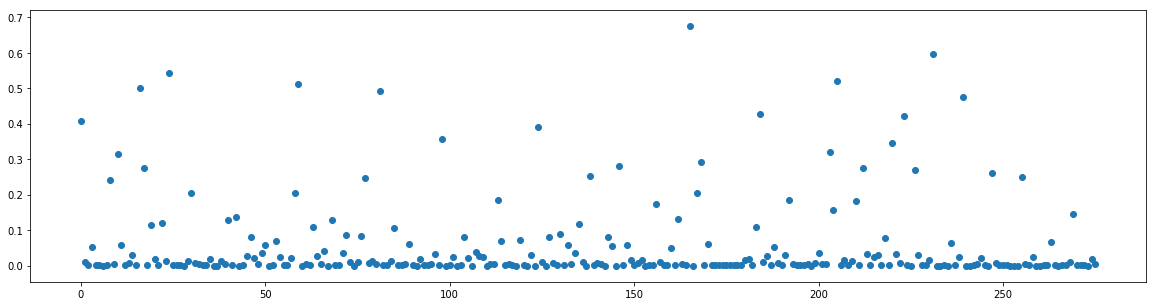

In [129]:
vs = np.array([probs_allClasses_allVariations[v][structure] for v in variants])[:, ::100]

plt.figure(figsize=(20,5));
for v in variants:
    plt.scatter(range(vs.shape[1]), vs[v]);

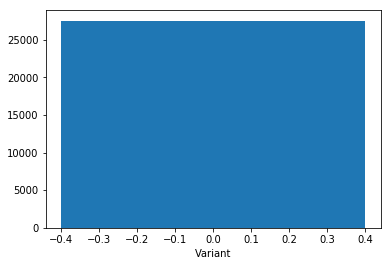

In [130]:
for structure in structures:
    plt.bar(variants, np.bincount(best_variation[structure], minlength=len(variants)))
    plt.xlabel('Variant');

In [131]:
title_viz_tuples = [("%d,%d" % (lo,hi), vizs[structures[0]])
 for (lo, hi), x in sorted(scoremap_viz_allSchemes_allFns_allStructs.items())
 for fn, vizs in x.iteritems()]

titles, vizs = zip(*title_viz_tuples)

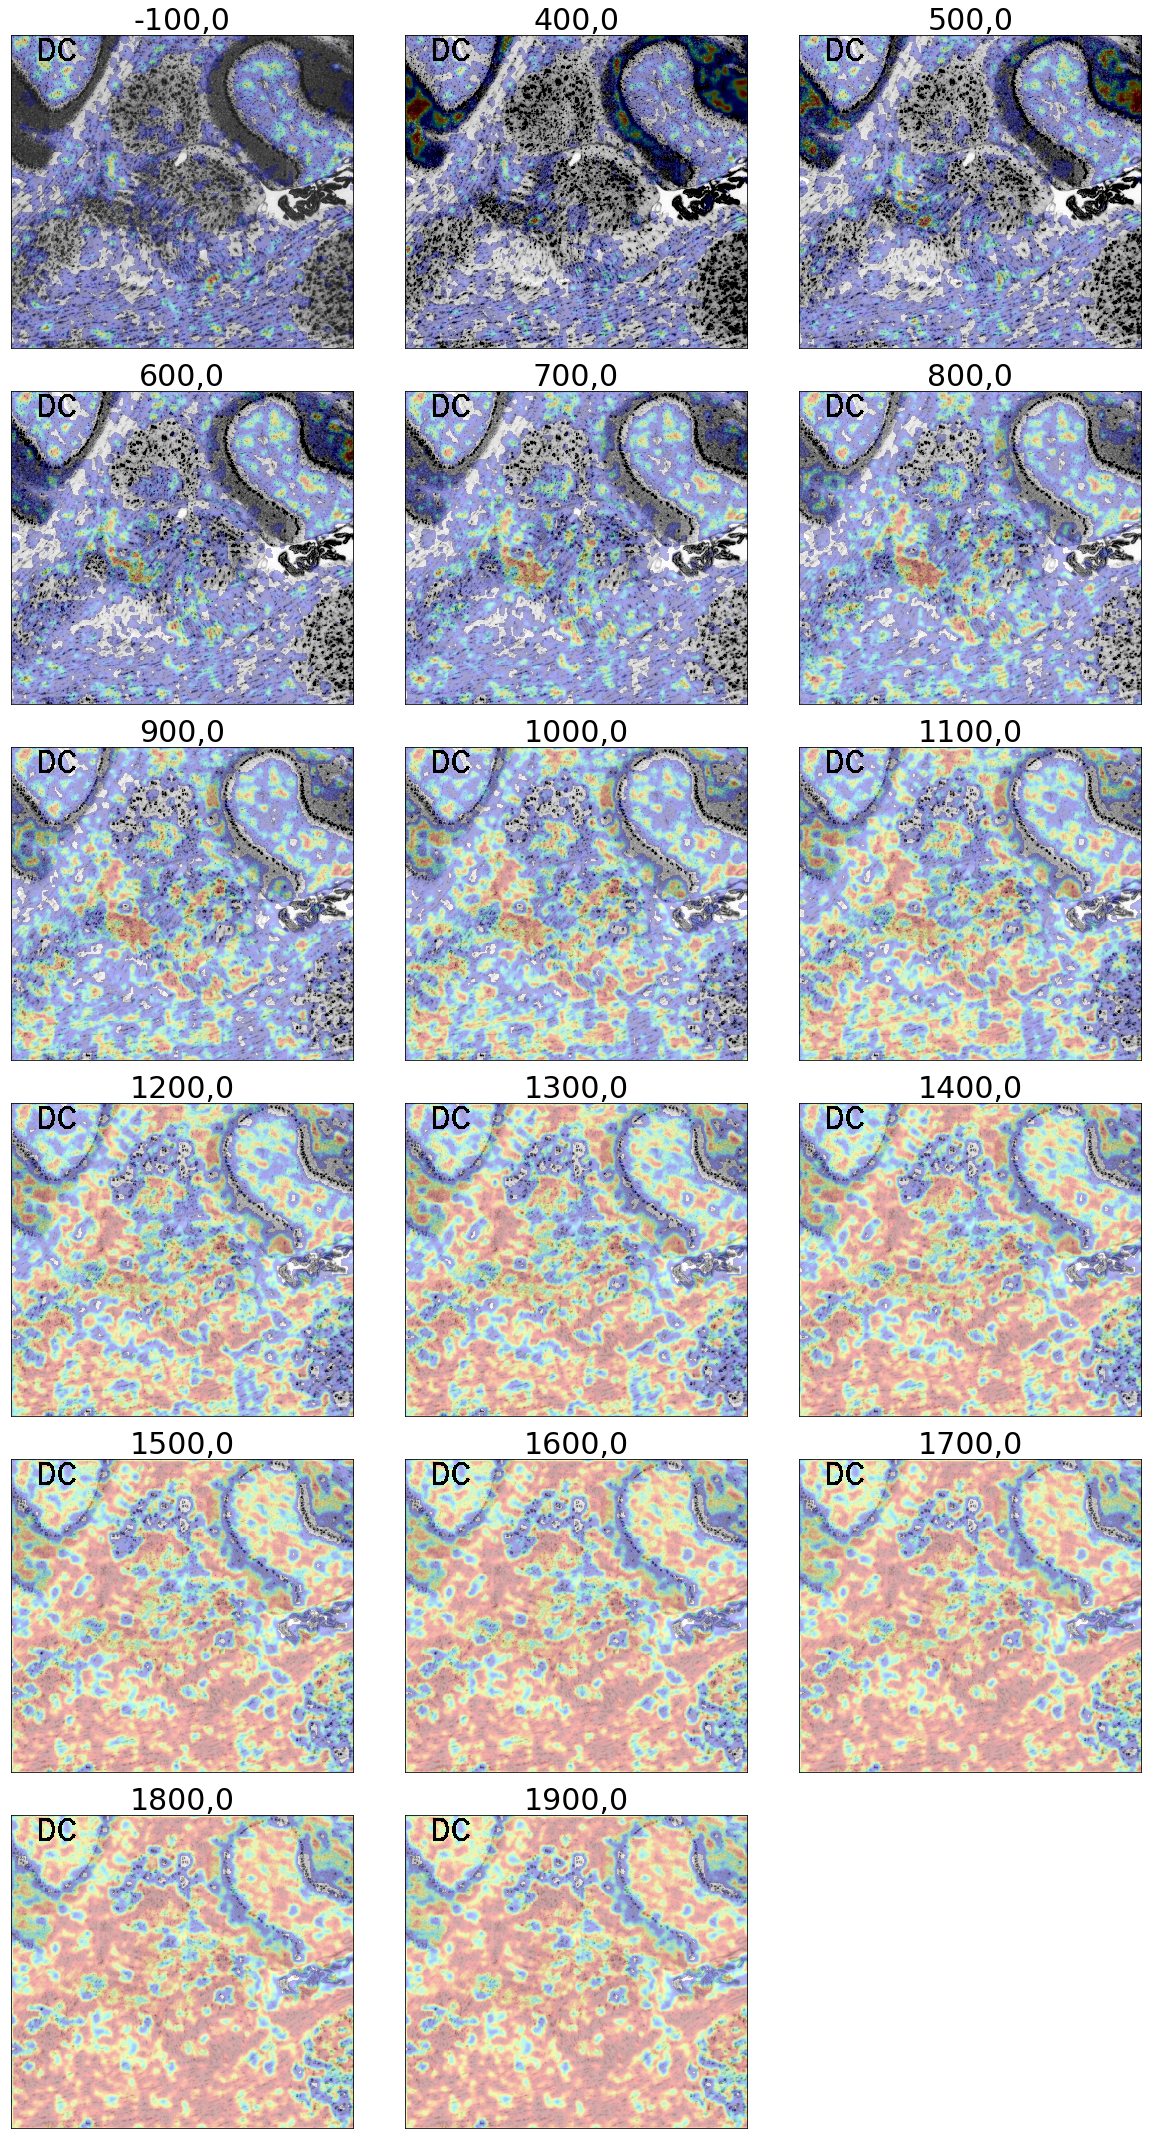

In [132]:
# no variants in testing
display_images_in_grids(vizs=vizs, titles=titles, nc=3)

In [133]:
stack = 'MD661'
grid_index_class_lookup = DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=windowing_id,
                                                                             by_human=True)

In [134]:
def identify_positive_negative_grids(stack, sec, structure, grid_indices, neg_composition_rule):
    """
    Args:
        grid_indices (list of int): grid indices to query
        neg_composition_rule (str): e.g. surround200
    
    Returns:
        (list of boolean, list of boolean): is_pos, is_neg
    """
    
    global grid_index_class_lookup
    d = grid_index_class_lookup.loc[sec].dropna()
    labels_found = list(d.index)

    pos_classes = [structure]
    print 'pos_classes', pos_classes

    if neg_composition_rule.startswith('surround'):
        if neg_composition_rule == 'surround200':
            margin_um = 200
        elif neg_composition_rule == 'surround500':
            margin_um = 500
        elif neg_composition_rule == 'surround1000':
            margin_um = 1000
        else:
            margin_um = None
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')] + \
        [convert_to_surround_name(structure, margin=margin_um, suffix=surr_l) for surr_l in all_known_structures]
    elif neg_composition_rule == 'negative':
        neg_classes = [structure + '_negative']
    else:
        raise

    neg_classes = list(set(neg_classes) & set(labels_found))
    print 'neg_classes', neg_classes

    #####################################

    pos_grid_indices = np.concatenate([d[pos_class] for pos_class in pos_classes])
    neg_grid_indices = np.concatenate([d[neg_class] for neg_class in neg_classes])

    #####################################

    n = len(grid_indices) 

    is_pos = np.in1d(grid_indices, pos_grid_indices)
    is_neg = np.in1d(grid_indices, neg_grid_indices)
    return is_pos, is_neg

In [135]:
def evaluate_scoremap(stack=None, sec=None, structure=None, is_pos=None, is_neg=None,
                      grid_indices=None, scores=None, 
                      neg_composition_rule='surround500'):
    """
    Args:
        grids_to_scores (dict of {int: float}): a mapping from grid indices to scores.
        
    Returns:
        fopt, optimal_th, precision_allthresh, recall_allthresh, f1score_allthresh, fp_allthresh, tp_allthresh      
    """
    
    if is_pos is None or is_neg is None:
        is_pos, is_neg = identify_positive_negative_grids(stack=stack, sec=sec, 
                                                          structure=structure, 
                                                          grid_indices=grid_indices,
                                                         neg_composition_rule=neg_composition_rule)
        
    n_pos = np.count_nonzero(is_pos)
    n_neg = np.count_nonzero(is_neg)
        
#     print n_pos, 'pos', n_neg, 'neg'
    
    scores_used = np.r_[scores[is_pos], scores[is_neg]]
    clf_labels = np.r_[np.ones((n_pos,)), -1*np.ones((n_neg,))]
    
    ######## PRECISION-RECALL ########
    precision_allthresh = {}
    recall_allthresh = {}
    f1score_allthresh = {}
    tp_allthresh = {}
    fp_allthresh = {}
    for th in np.arange(0., 1., 0.01):

        cm = compute_confusion_matrix(np.c_[scores_used, 1-scores_used], [0 if l==1. else 1 for l in clf_labels], 
                                      soft=False, normalize=False, binary=True, decision_thresh=th)

        tp = cm[0,0]
        fn = cm[0,1]
        fp = cm[1,0]
        tn = cm[1,1]
#         print th, int(tp), int(fn), int(fp), int(tn)

        precision = float(tp) / (tp + fp)
        recall = float(tp) / (tp + fn)
        
        beta = 1 # higher for more emphasis on recall
        f1score = (1+beta**2)*recall*precision/(recall+ beta**2*precision)

        fp_allthresh[th] = fp / (fp + tn)
        tp_allthresh[th] = tp / (tp + fn)
        
        precision_allthresh[th] = precision
        recall_allthresh[th] = recall
        f1score_allthresh[th] = f1score

    optimal_th = np.arange(0, 1, 0.01)[np.nanargmax([f1score_allthresh[th] for th in np.arange(0, 1, 0.01)])]            
    fopt = f1score_allthresh[optimal_th]
    
    return fopt, optimal_th, precision_allthresh, recall_allthresh, f1score_allthresh, fp_allthresh, tp_allthresh
# pos_grid_indices, neg_grid_indices

In [136]:
sec = metadata_cache['filenames_to_sections'][stack][fn]

## One intensity correction scheme

In [56]:
fopt, optimal_th, precision_allthresh, recall_allthresh, f1score_allthresh, fp_allthresh, tp_allthresh = \
evaluate_scoremap(stack=stack, sec=sec, structure=structure,
                  grid_indices=sparse_grids_allSchemes_allFns_allStructs[fn], 
                  scores=sparse_scores_allSchemes_allFns_allStructs[(-100,0)][fn][structure],
                 neg_composition_rule='surround500')

print fopt, optimal_th

pos_classes ['VCA']
neg_classes ['VCA_surround_500_VCP', 'VCA_surround_500_DC', 'VCA_surround_500_noclass']
938 6183
0.308191808192 0.01


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


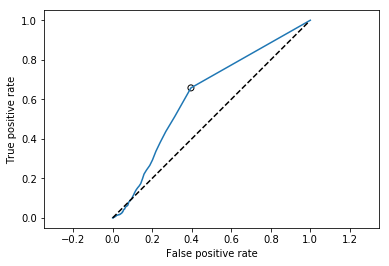

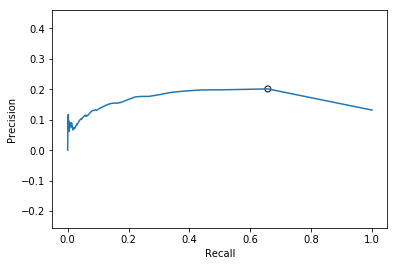

In [57]:
plot_roc_curve(fp_allthresh, tp_allthresh, optimal_th)
plot_pr_curve(precision_allthresh, recall_allthresh, optimal_th)

In [ ]:
#     interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

## Multiple intensity correction schemes

In [137]:
is_pos, is_neg = identify_positive_negative_grids(stack=stack, sec=sec, 
                                                  structure=structure,
                                                  grid_indices=sparse_grids_allSchemes_allFns_allStructs[fn], 
                                                  neg_composition_rule='surround500')

pos_classes ['DC']
neg_classes ['DC_surround_500_VCA', 'DC_surround_500_VCP', 'DC_surround_500_noclass']


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


-100 0 0.303118091027 0.0
400 0 0.303118091027 0.0
500 0 0.303118091027 0.0
600 0 0.303118091027 0.0
700 0 0.306384833297 0.01
800 0 0.317160469278 0.01
900 0 0.321262766945 0.01
1000 0 0.32012059945 0.01
1100 0 0.321876611102 0.01
1200 0 0.319846179569 0.01
1300 0 0.314931093533 0.01
1400 0 0.311537200918 0.02
1500 0 0.308436844652 0.02
1600 0 0.306879141685 0.01
1700 0 0.305710470505 0.01
1800 0 0.306159563533 0.02
1900 0 0.306716956906 0.05


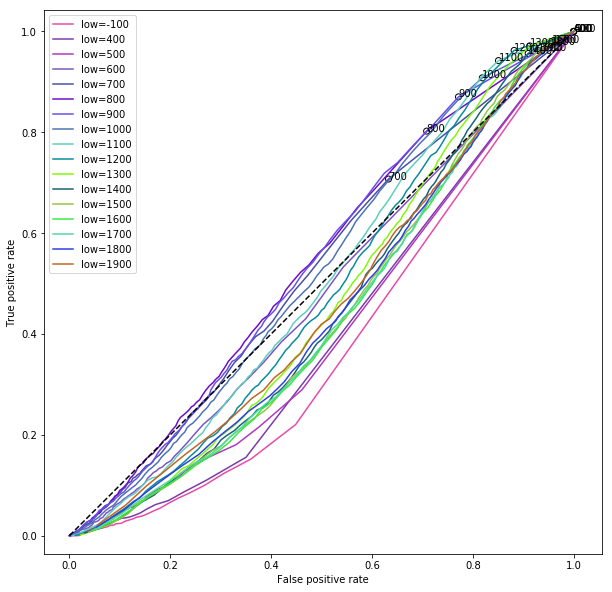

In [139]:
plt.figure(figsize=(10, 10));

for low, hi in sorted(sparse_scores_allSchemes_allFns_allStructs.keys()):
    fopt, optimal_th, precision_allthresh, recall_allthresh, f1score_allthresh, fp_allthresh, tp_allthresh = \
    evaluate_scoremap(grid_indices=sparse_grids_allSchemes_allFns_allStructs[fn], 
                      scores=sparse_scores_allSchemes_allFns_allStructs[(low, hi)][fn][structure],
                     is_pos=is_pos, is_neg=is_neg)

    print low, hi, fopt, optimal_th

    plt.plot([fp_allthresh[th] for th in np.arange(0, 1, 0.01)],
                 [tp_allthresh[th] for th in np.arange(0, 1, 0.01)],
            label='low=%d'%low, c=np.array(random_colors(1)[0])/255.);

    plt.scatter(fp_allthresh[optimal_th], tp_allthresh[optimal_th], 
                marker='o', facecolors='none', edgecolors='k')
    
#     plt.text(fp_allthresh[optimal_th], tp_allthresh[optimal_th], '%d(%.2f)' % (low, fopt))
    plt.text(fp_allthresh[optimal_th], tp_allthresh[optimal_th], '%d' % (low))

plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), c='k', linestyle='--');
    
plt.legend();
plt.axis('equal');
plt.ylabel('True positive rate');
plt.xlabel('False positive rate');
plt.title('');
plt.show();

In [71]:
# viz = scoremap_viz_allSchemes_allFns_allStructs[(low,high)][fn][structure].copy()
# for x, y in sample_locations[pos_grid_indices] - (roi_xmin, roi_ymin):
#     cv2.circle(viz, (x/8,y/8), 1, color=(255,0,0))
# for x, y in sample_locations[neg_grid_indices] - (roi_xmin, roi_ymin):
#     cv2.circle(viz, (x/8,y/8), 1, color=(0,255,0))
# display_image(viz)